In [1]:
library(outbreaks)
data(influenza_england_1978_school)
Ndata <- 763
sol <- influenza_england_1978_school
sol$time <- as.numeric(sol$date-min(sol$date)) + 2
sol$I <- sol$in_bed
forfit.sol <- sol
noisy_I <- forfit.sol$I/Ndata
iniTime <- 0
iniI <- 1/Ndata

In [2]:
epi.data <- list(
  n_obs = length(noisy_I),
  t0 = iniTime,
  ts = forfit.sol$time,
  y_init = iniI,
  y = noisy_I,
  kb = 1,
  thetab = 1,
  kg = 1,
  thetag = 1,
  as = 9,
  bs = 1
)

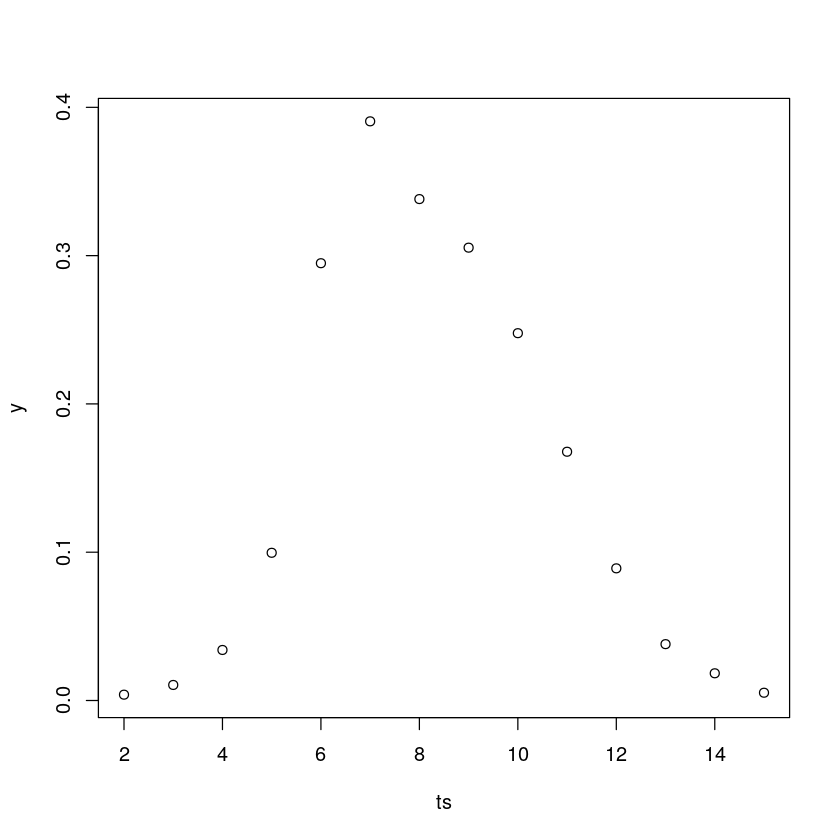

In [3]:
plot(epi.data$ts, epi.data$y, xlab = "ts", ylab = "y")

In [4]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
SIR_code <- stan_model(file = "stan/sir_simple_I_logn.stan")

Loading required package: StanHeaders
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [5]:
## We find the Maximum a posteriori estimates, just to see how well-posed the problem is
SIR.map <- optimizing(SIR_code, data = epi.data, hessian = TRUE, verbose = TRUE)

Chain 1: Initial log joint probability = -4344.55
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1: Exception: Max number of iterations exceeded (1000000).  (in 'model269bb6c40a4_sir_simple_I_logn' at line 53)

Exception: lognormal_lpdf: Location parameter[1] is nan, but must be finite!  (in 'model269bb6c40a4_sir_simple_I_logn' at line 61)

Exception: lognormal_lpdf: Location parameter[12] is nan, but must be finite!  (in 'model269bb6c40a4_sir_simple_I_logn' at line 61)


Chain 1:       19         23.68      0.357758       3.63611      0.8615      0.8615       36   
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1: Exception: lognormal_lpdf: Location parameter[2] is nan, but must be finite!  (in 'model269bb6c40a4_sir_simple_I_logn' at line 61)


Chain 1:       39        31.556   0.000332812     0.0115921      0.6299      0.6299       85   
Chain 1:     Iter      log p

In [6]:
SIR.map

$par
  r_init[1]   r_init[2]        beta       gamma          S0       sigma 
0.413535889 0.281126667 1.869742093 0.581465171 0.999769129 0.386116660 
         R0  y_hat[1,1]  y_hat[2,1]  y_hat[3,1]  y_hat[4,1]  y_hat[5,1] 
3.215570231 0.995717706 0.984413677 0.945921648 0.832577048 0.602307795 
 y_hat[6,1]  y_hat[7,1]  y_hat[8,1]  y_hat[9,1] y_hat[10,1] y_hat[11,1] 
0.349449215 0.193174326 0.119134459 0.084744718 0.067733676 0.058739166 
y_hat[12,1] y_hat[13,1] y_hat[14,1]  y_hat[1,2]  y_hat[2,2]  y_hat[3,2] 
0.053737496 0.050859272 0.049166059 0.003019508 0.010772811 0.036860695 
 y_hat[4,2]  y_hat[5,2]  y_hat[6,2]  y_hat[7,2]  y_hat[8,2]  y_hat[9,2] 
0.110512961 0.240097576 0.323652708 0.295586169 0.219316240 0.147781256 
y_hat[10,2] y_hat[11,2] y_hat[12,2] y_hat[13,2] y_hat[14,2]  y_hat[1,3] 
0.095112738 0.059798568 0.037122646 0.022881051 0.014044453 0.001262786 
 y_hat[2,3]  y_hat[3,3]  y_hat[4,3]  y_hat[5,3]  y_hat[6,3]  y_hat[7,3] 
0.004813513 0.017217657 0.056909991 0.157594630 0.326898077 0.511239506 
 y_hat[8,3]  y_hat[9,3] y_hat[10,3] y_hat[11,3] y_hat[12,3] y_hat[13,3] 
0.661549301 0.767474026 0.837153586 0.881462266 0.909139858 0.926259677 
y_hat[14,3]       y0[1]       y0[2]       y0[3]    y_rep[1]    y_rep[2] 
0.936789488 0.999769129 0.000230871 0.000000000 0.008435484 0.008944240 
   y_rep[3]    y_rep[4]    y_rep[5]    y_rep[6]    y_rep[7]    y_rep[8] 
0.039745002 0.105851281 0.172011180 0.418347046 0.490358656 0.121741293 
   y_rep[9]   y_rep[10]   y_rep[11]   y_rep[12]   y_rep[13]   y_rep[14] 
0.168456405 0.133676041 0.043918466 0.052732681 0.014954797 0.007856732 

$value
[1] 31.55605

$return_code
[1] 0

$hessian
         r_init.1 r_init.2         beta        gamma            S0
r_init.1        0        0     0.000000    0.0000000   0.000000000
r_init.2        0        0     0.000000    0.0000000   0.000000000
beta            0        0 -2374.821908  218.9271693 245.479940834
gamma           0        0   218.927169 -211.5435436 -35.722186968
S0              0        0   245.479941  -35.7221870 -30.815225767
sigma           0        0    -2.950542   -0.8811784   0.002369935
                 sigma
r_init.1   0.000000000
r_init.2   0.000000000
beta      -2.950541652
gamma     -0.881178371
S0         0.002369935
sigma    -10.577806044

$theta_tilde
     r_init[1] r_init[2]     beta     gamma        S0     sigma      R0
[1,] 0.4135359 0.2811267 1.869742 0.5814652 0.9997691 0.3861167 3.21557
     y_hat[1,1] y_hat[2,1] y_hat[3,1] y_hat[4,1] y_hat[5,1] y_hat[6,1]
[1,]  0.9957177  0.9844137  0.9459216   0.832577  0.6023078  0.3494492
     y_hat[7,1] y_hat[8,1] y_hat[9,1] y_hat[10,1] y_hat[11,1] y_hat[12,1]
[1,]  0.1931743  0.1191345 0.08474472  0.06773368  0.05873917   0.0537375
     y_hat[13,1] y_hat[14,1]  y_hat[1,2] y_hat[2,2] y_hat[3,2] y_hat[4,2]
[1,]  0.05085927  0.04916606 0.003019508 0.01077281  0.0368607   0.110513
     y_hat[5,2] y_hat[6,2] y_hat[7,2] y_hat[8,2] y_hat[9,2] y_hat[10,2]
[1,]  0.2400976  0.3236527  0.2955862  0.2193162  0.1477813  0.09511274
     y_hat[11,2] y_hat[12,2] y_hat[13,2] y_hat[14,2]  y_hat[1,3]  y_hat[2,3]
[1,]  0.05979857  0.03712265  0.02288105  0.01404445 0.001262786 0.004813513
     y_hat[3,3] y_hat[4,3] y_hat[5,3] y_hat[6,3] y_hat[7,3] y_hat[8,3]
[1,] 0.01721766 0.05690999  0.1575946  0.3268981  0.5112395  0.6615493
     y_hat[9,3] y_hat[10,3] y_hat[11,3] y_hat[12,3] y_hat[13,3] y_hat[14,3]
[1,]   0.767474   0.8371536   0.8814623   0.9091399   0.9262597   0.9367895
         y0[1]       y0[2] y0[3]    y_rep[1]   y_rep[2]   y_rep[3]   y_rep[4]
[1,] 0.9997691 0.000230871     0 0.002010921 0.01266155 0.03317015 0.07520766
      y_rep[5]  y_rep[6]  y_rep[7]  y_rep[8]  y_rep[9]  y_rep[10]  y_rep[11]
[1,] 0.1727486 0.3035192 0.7277619 0.5859317 0.1313329 0.07215706 0.07543893
      y_rep[12]  y_rep[13]  y_rep[14]
[1,] 0.04420487 0.00806755 0.01306426


Divergences:


0 of 4000 iterations ended with a divergence.



Tree depth:


0 of 4000 iterations saturated the maximum tree depth of 10.



Energy:


E-BFMI indicated no pathological behavior.


Inference for Stan model: sir_simple_I_logn.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean   sd 2.5%  25%  50%  75% 97.5% n_eff Rhat
beta  1.81    0.00 0.12 1.57 1.74 1.82 1.89  2.05  2721    1
gamma 0.60    0.00 0.06 0.48 0.55 0.59 0.63  0.73  3753    1
S0    1.00    0.00 0.00 1.00 1.00 1.00 1.00  1.00  2127    1
R0    3.08    0.01 0.41 2.36 2.81 3.06 3.33  3.95  3518    1
sigma 0.50    0.00 0.12 0.32 0.41 0.48 0.56  0.78  2255    1

Samples were drawn using NUTS(dense_e) at Sat Sep 21 08:11:02 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


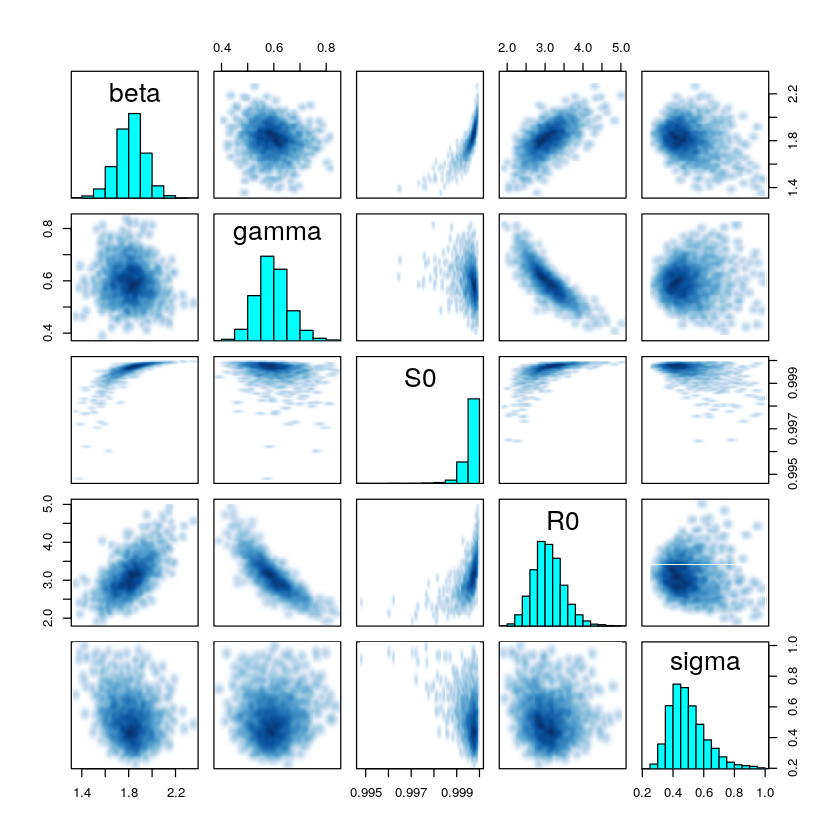

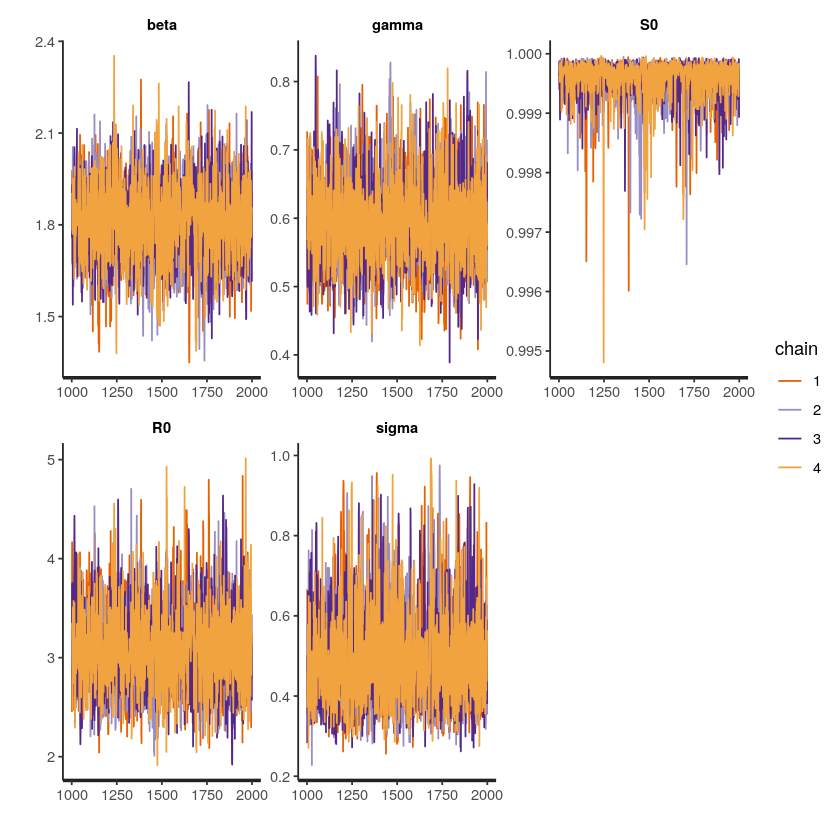

In [8]:
SIR.posterior <- sampling(SIR_code, data = epi.data,
                         chains = 4,
                         control = list(adapt_delta = .9, metric = 'dense_e'))
check_hmc_diagnostics(SIR.posterior)
print(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
pairs(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
stan_trace(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))

In [11]:
rnorm_trunc <- function(n, m, s, lb = 0, ub = 1){
  ql <- pnorm(q = lb, mean = m, sd = s)
  qu <- pnorm(q = ub, mean = m, sd = s)
  U <- runif(n = n, min = ql, max = qu)
  return(
    qnorm(U, mean = m, sd = s)
  ) 
}
## 
generate_lognormal_trajectory <- function(times,
                                          mu_b, sd_b,
                                          mu_g, sd_g,
                                          a_s, b_s,
                                          mu_s = .5, sd_s = .5){
  N <- length(times)  
  beta <- rlnorm(1, meanlog = mu_b, sdlog = sd_b)
  gamma <- rlnorm(1, meanlog = mu_g, sdlog = sd_g)
  sigma <- rnorm_trunc(1, m = mu_s, s = sd_s)
  S0 <- rbeta(n = 1, shape1 = a_s, shape2 = b_s)
  ## ODE solving
    require(deSolve)
  sir <- function(time, state, parameters) {
    with(as.list(c(state, parameters)), {
      dS <- -beta * S * I
      dI <-  beta * S * I - gamma * I
      dR <-                 gamma * I
      
      return(list(c(dS, dI, dR)))
    })
  }
  init       <- c(S = S0, I = 1-S0, R = 0.0)
  parameters <- c(beta = beta, gamma = gamma)
  sol <- as.data.frame(ode(y = init, times = times, func = sir, parms = parameters)) 
  ##
  traj <- 
    return(
      rlnorm(N, mean = log(sol$I), sd = sigma)
    )
}

In [12]:
source("utils.r")

In [13]:
# Prior parameters
b.pars <- pars_mm_lognormal(k = epi.data$kb, theta = epi.data$thetab)
g.pars <- pars_mm_lognormal(k = epi.data$kg, theta = epi.data$thetag)
mu.b <- b.pars$mu
sd.b <- b.pars$sigma
mu.g <- g.pars$mu
sd.g <- g.pars$sigma

N <- 1
mu.r <- log(N) + mu.b - mu.g
sd.r <- sqrt(sd.b^2 + sd.g^2)

In [14]:
Nrep <- 4000
prior.trajectories <- matrix(NA, ncol = length(epi.data$ts), nrow = Nrep)
for(i in 1:Nrep){
    prior.trajectories[i, ] <- suppressWarnings(
        generate_lognormal_trajectory(times = epi.data$ts,
                                   mu_b = mu.b, sd_b = sd.b,
                                   mu_g = mu.g, sd_g = sd.g,
                                   a_s = epi.data$as, b_s = epi.data$bs,
                                   mu_s = 0.5, sd_s = 0.5)
    )
}

Loading required package: deSolve


In [22]:
prior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025, na.rm = TRUE))),
  post_mean = colMeans(prior.trajectories, na.rm = TRUE),
  upper = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975, na.rm = TRUE))),
  distribution = "prior"
)

In [16]:
posterior.trajectories <- extract(SIR.posterior, 'y_rep')$y_rep
posterior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025))),
  post_mean = colMeans(posterior.trajectories),
  upper = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975))),
  distribution = "posterior"
)

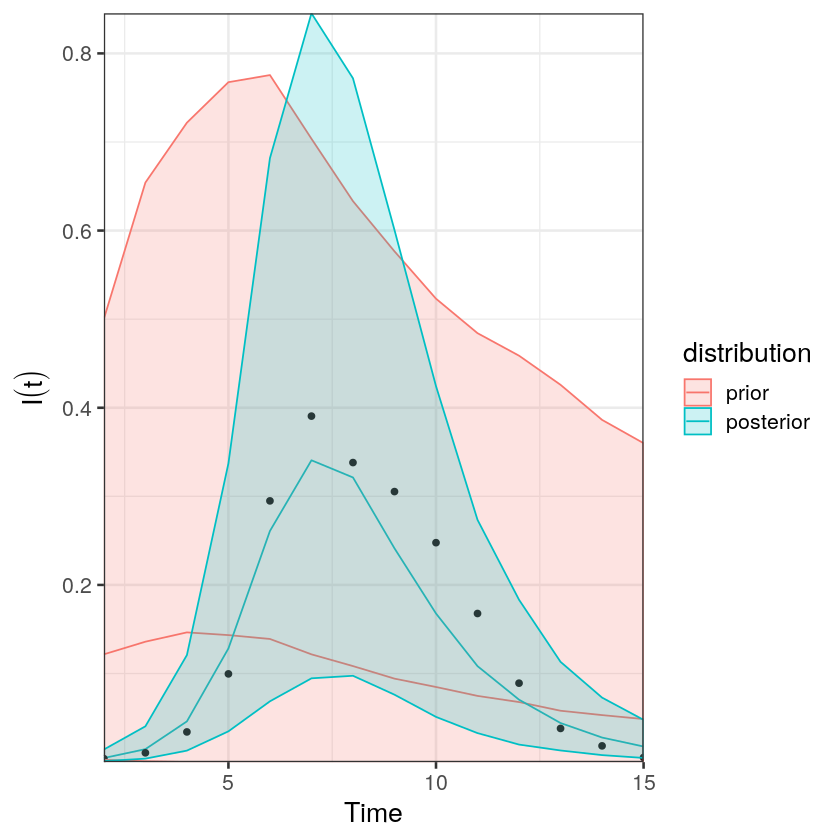

In [24]:
library(ggplot2)

predicted.incidence <- rbind(prior.predicted.incidence, posterior.predicted.incidence)

predictions_SIR <- ggplot(data = predicted.incidence, aes(x = time, y = post_mean,
                                                          colour = distribution, fill = distribution)) +
  geom_line() +
  geom_point(data = data.frame(time = epi.data$ts, I = epi.data$y),
             aes(x = time, y = I), inherit.aes = FALSE) +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2) +
  scale_x_continuous("Time", expand = c(0, 0)) + 
  scale_y_continuous(expression(I(t)), expand = c(0, 0)) + 
  theme_bw(base_size = 16)

predictions_SIR

Warning message:
“Removed 102 rows containing non-finite values (stat_density).”

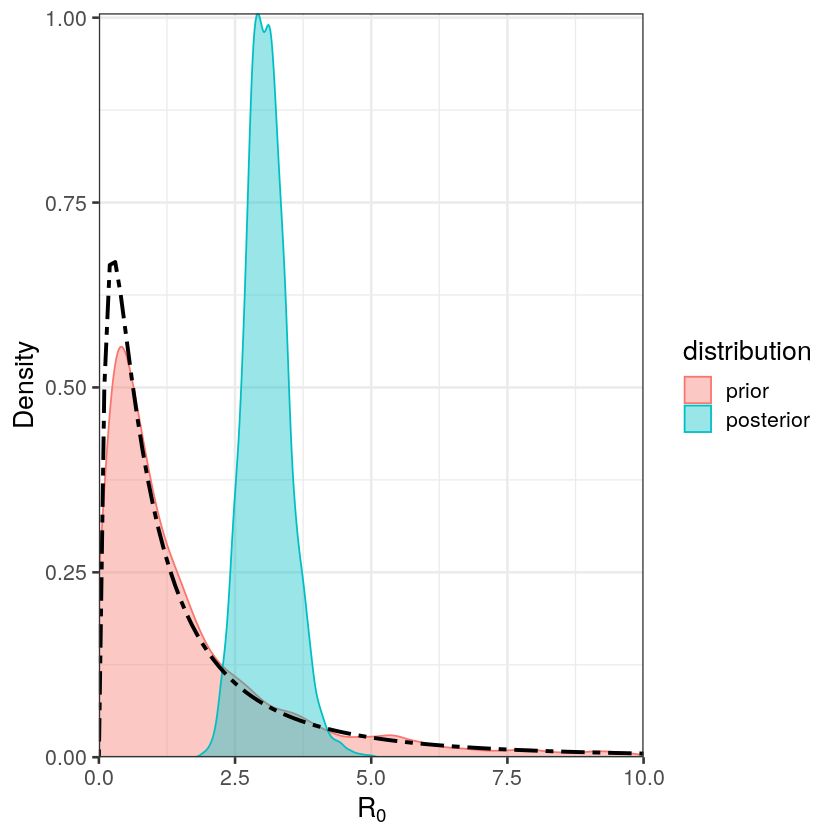

In [18]:
R0.prior.samples <- data.frame(R0 = rlnorm(n = Nrep, meanlog = mu.r, sdlog = sd.r), distribution = "prior")
R0.posterior.samples <- data.frame(R0 = extract(SIR.posterior, 'R0')$R0, distribution = "posterior")

# R0.prior.samples <- data.frame(R0 = rep(NA, N), distribution = "prior")

R0.dt <- rbind(R0.prior.samples,
               R0.posterior.samples)

R0_posterior <- ggplot(data = R0.dt, aes(x = R0, colour = distribution, fill = distribution)) +
  geom_density(alpha = .4) +
#   geom_vline(xintercept = 1.5, linetype = "dotted", size = 1.01) + 
  scale_fill_discrete(drop = FALSE) +
  scale_colour_discrete(drop = FALSE) +
  stat_function(fun = function(x) dlnorm(x, meanlog = mu.r, sdlog = sd.r),
                inherit.aes = FALSE, linetype = "twodash", size = 1.10) +
  scale_x_continuous(expression(R[0]), expand = c(0, 0), limits = c(0, 10)) + 
  scale_y_continuous("Density", expand = c(0, 0)) + 
  theme_bw(base_size = 16)
R0_posterior

In [19]:
mean(R0.prior.samples$R0 < 5)

[1] 0.91375

In [20]:
mean(R0.posterior.samples$R0 < 5)

[1] 0.99975